In [2]:
using LinearAlgebra
using PyPlot

Solving environment: ...working... done

## Package Plan ##

  environment location: /root/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h4e544f5_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h4e544f5_7          19 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.32.0           |   py39h0fd3b05_0         1.6 MB  conda-forge
    freetype-2.10.4            |       hdf53a3c_1         988 KB  conda-forge
    giflib-5.2.1               |       hb9de7d4_2          78 KB  conda-forge
    jbig-2.1                   |    hf897c2e_2003          44 KB  conda-forge
    jpeg-9e                    |       h3557bc0_0         438 KB  conda-forge
    kiwisolver-1.4.2           |   py39h110580c_1          75 KB  conda-forge
   

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /root/.julia/packages/PyCall/7a7w0/src/PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /root/.julia/packages/Conda/x2UxR/src/Conda.jl:127


## 行列の正定値性

In [3]:
n = 3
B = randn(3, 3)
A = B'B
λs, vs = eigvals(A), eigvecs(A)
println("eigen values:\n", λs, "\n\neigen vectors:\n", vs)

eigen values:
[0.09247241841653592, 1.6443998303396883, 3.918259557463282]

eigen vectors:
[-0.2574933120638891 -0.19850794669991834 0.9456700213813225; -0.7831157728683502 -0.5304502344707626 -0.3245800903239749; -0.5660626118435794 0.8241463121599801 0.01886731634147259]


In [4]:
S = []
for i in 1:10
    z = randn(n)
    y = z'*A*z
    push!(S, y)
end
print(S)

Any[0.829746090577512, 11.916934311874138, 6.829909760579525, 8.524046194292762, 17.739578607220203, 10.948109417015296, 6.770690144284742, 1.094478793046151, 6.489351814342945, 3.7765052209711762]

## カーネル

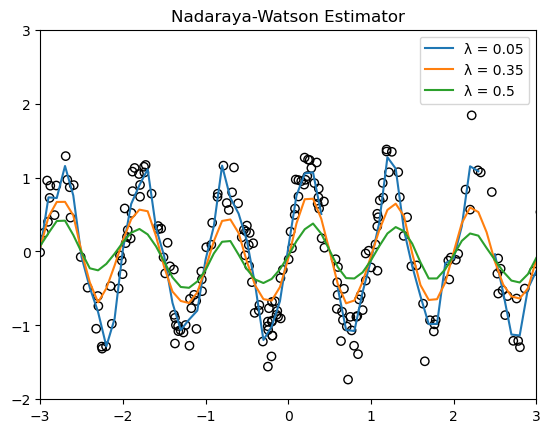

In [27]:
n = 250
x = 2randn(n)
y = sin.(2π*x) .+ randn(n)./4

D(t) = max(0.75(1 - t^2), 0)
k(x, y, λ) = D(abs(x - y) / λ)
f(z, λ) = sum(k.(x, z, λ) .* y) / sum(k.(x, z, λ))

fig, ax = subplots()
ax.set_xlim(-3, 3); ax.set_ylim(-2, 3)
ax.scatter(x, y, facecolors="none", edgecolors="k", marker="o")

xs = -3:0.1:3
λs = [0.05, 0.35, 0.50]
for λ in λs
    ax.plot(xs, f.(xs, λ), label="λ = $(λ)")
end
ax.legend()
ax.set_title("Nadaraya-Watson Estimator")
show()